In [69]:
import torch
import pickle
import numpy as np
from dis import dis
from astyx_utils import *
import matplotlib.pyplot as plt
from PIL import Image

In [70]:
with open('box.pickle', 'rb') as handle:
    box = pickle.load(handle)
box.shape

torch.Size([22, 7])

In [71]:
center = box[:,0:3]
center.shape
zeros = np.zeros((center.shape[0], 3))
center

tensor([[ 1.2031e+01,  1.2332e+01, -2.4059e-01],
        [ 4.0784e+01, -8.5878e+00,  4.6468e-01],
        [ 2.8868e+01,  2.7534e+00,  5.0707e-01],
        [ 4.6299e+01,  6.2338e+00,  8.1870e-01],
        [ 3.1360e+01, -1.1791e-01,  5.2009e-01],
        [ 2.6353e+01, -2.7161e+01,  2.7408e-01],
        [ 2.1549e+01, -2.8780e+01, -1.9644e-01],
        [ 1.5247e+01, -4.0475e+01, -5.3947e-02],
        [ 1.8428e+01, -3.4142e+01,  8.7303e-03],
        [ 1.0114e-02, -7.9853e+00, -7.0355e-01],
        [ 5.0674e+01, -1.4606e+01,  1.2690e+00],
        [ 6.3665e-01,  4.6160e-01, -5.9027e-01],
        [ 4.3061e+01, -1.9957e+01,  5.6575e-01],
        [ 5.1471e+01, -4.0810e+01,  6.3641e-01],
        [ 2.6347e+01, -3.0667e+01,  3.8692e-01],
        [ 1.1439e+00,  3.3504e+01,  5.1870e-01],
        [ 1.3148e+01,  2.5728e+01, -3.1493e-03],
        [ 1.2586e+01,  2.9624e+01,  2.3119e-01],
        [ 1.9985e+01, -3.0375e+01, -3.6123e-02],
        [ 2.9750e+01, -1.4332e+00,  4.9913e-01],
        [ 3.2446e+01

In [72]:
box_point = np.concatenate((center, zeros), axis=1)
box_point.shape

(22, 6)

In [73]:
data = Astyx_Data()
img = data.get_camera("0038")
params = data.get_calibration_details()
proj = astyx_projection(params)

lidar_image = proj.lidar2CameraAstyx(box_point[:,:3])
lidar_image = lidar_image.astype(int)
lidar_image

array([[  -612,    361],
       [  1546,    295],
       [   982,    288],
       [   911,    291],
       [  1162,    288],
       [  3176,    276],
       [  3833,    306],
       [  7030,    258],
       [  5012,    273],
       [-23610,  -1270],
       [  1692,    269],
       [  -306,   1858],
       [  2029,    286],
       [  2683,    281],
       [  3458,    264],
       [-17952,    159],
       [ -2037,    343],
       [ -2601,    319],
       [  4243,    286],
       [  1244,    286],
       [  3177,    250],
       [ 17545,    277]])

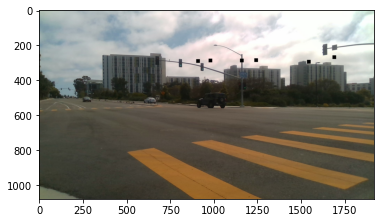

In [74]:
# get empty canvas for img display
# img = np.zeros((img.shape[0], img.shape[1], 3))

radius = 10
for i in range(lidar_image.shape[0]):
        if lidar_image[i,1] < img.shape[0]-radius and lidar_image[i,0] < img.shape[1]-radius and lidar_image[i,1] >= radius and lidar_image[i,0] >= radius:
                    img[lidar_image[i,1]-radius : lidar_image[i,1]+radius+1,
                    lidar_image[i,0]-radius : lidar_image[i,0]+radius+1,
                    :] = 256
plt.imshow(img)

In [75]:
with open('boxes_2D.pickle', 'rb') as handle:
    boxes_2D = pickle.load(handle)
boxes_2D

tensor([[ 601.7733,  499.3728,  672.7422,  535.5947],
        [ 249.6885,  494.4106,  298.2574,  526.0343],
        [ 904.0054,  472.4310, 1078.1804,  561.8030]])

In [76]:
def inside_box(center, boxes):
    for i in range(boxes.shape[0]):
        box = boxes[i,:]
        if center[0] > max(box[0], box[1]):
            return False
        if center[0] < min(box[0], box[1]):
            return False
        if center[1] > max(box[2], box[3]):
            return False
        if center[1] < min(box[2], box[3]):
            return False
    return True

In [77]:
for i in range(lidar_image.shape[0]):
    if inside_box(lidar_image[i,:], boxes_2D):
        print("inside")
    else:
        print("outside")

outside
outside
outside
outside
outside
outside
outside
outside
outside
outside
outside
outside
outside
outside
outside
outside
outside
outside
outside
outside
outside
outside
